* Created By: Blessy Louis (2348416) 4MDS'B'
* Created On : 07.07.2024



## **Lab Exercise 1:**
* Graph Construction and Manipulation: Load a small real-world dataset (socialnetwork, citation network) and construct different representations. Implement basic transformations.

## **Domain: Transportation and Logistics**

# **Dataset Description:**
https://www.kaggle.com/datasets/harshsingh2209/supply-chain-analysis?resource=download



The dataset used in this analysis is a fictional example meant to represent real-world data typically found in supply chain management and product distribution networks. The dataset consists of information about various products, their suppliers, shipping carriers, and associated attributes. The columns in the dataset provide details that can be used to analyze the relationships between products, suppliers, and other entities in the supply chain.

#### Columns and Their Descriptions:

1. **Product type**: The category or type of the product (e.g., haircare, skincare, cosmetics).
2. **SKU**: Stock Keeping Unit, a unique identifier for each product.
3. **Price**: The price of the product.
4. **Availability**: The number of units available in stock.
5. **Number of products sold**: The total number of units sold.
6. **Revenue generated**: The total revenue generated from the sales of the product.
7. **Customer demographics**: Information about the customer demographic for each product (e.g., Non-binary, Female, Male, Unknown).
8. **Stock levels**: The current stock level of the product.
9. **Lead times**: The lead time for the product to be restocked.
10. **Order quantities**: The quantities in which the product is ordered.
11. **Shipping times**: The time it takes to ship the product.
12. **Shipping carriers**: The carriers used for shipping the product (e.g., Carrier A, Carrier B, Carrier C).
13. **Shipping costs**: The cost associated with shipping the product.
14. **Supplier name**: The name of the supplier providing the product.
15. **Location**: The location of the supplier.
16. **Lead time**: The lead time from the supplier to deliver the product.
17. **Production volumes**: The production volumes of the product.
18. **Manufacturing lead time**: The time taken to manufacture the product.
19. **Manufacturing costs**: The cost of manufacturing the product.
20. **Inspection results**: The results of product inspection (e.g., Pending, Pass, Fail).
21. **Defect rates**: The defect rate of the product.
22. **Transportation modes**: The mode of transportation used (e.g., Road, Air, Rail, Sea).
23. **Routes**: The transportation routes used (e.g., Route A, Route B, Route C).
24. **Costs**: The overall cost associated with the product, including manufacturing and transportation costs.



# Objective
The objective of this analysis is to construct and manipulate a graph representing the relationships between products and their suppliers.

* Understand the connectivity between products and suppliers.
* Identify key suppliers and their impact on the supply chain.
* Analyze the structure of the network to make informed decisions about supply chain management.
* Perform basic graph transformations to study the effects on the network.

# About the Graph
* Nodes Set: The nodes in the graph represent the products (identified by SKU) and the suppliers. Each product and supplier is a node in the network.
* Edges Set: The edges represent the relationships between products and their suppliers. Each edge carries attributes such as lead time from the supplier.

# **Implementation Code**

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('/content/supply_chain_data.csv')

# **Creating Product- supplier graph**

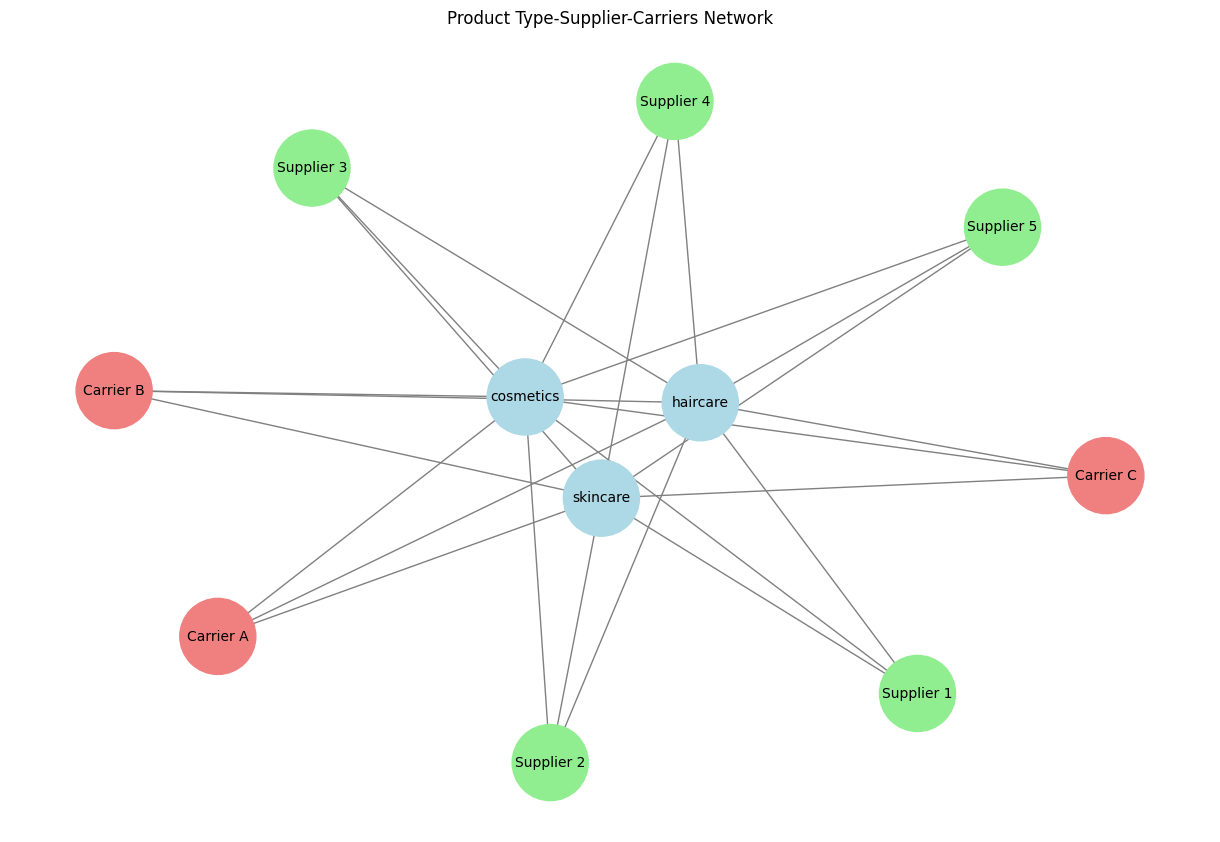

In [ ]:
# Filter the dataset to include only specific product types
filtered_df = df[df['Product type'].isin(['haircare', 'skincare', 'cosmetics'])]

# Create an undirected graph for Product Type-Supplier-Carriers Network
G = nx.Graph()

# Adding nodes for Product Types
product_types = ['haircare', 'skincare', 'cosmetics']
G.add_nodes_from(product_types, type='product')

# Adding edges for Product Types to Suppliers and Shipping Carriers
for index, row in filtered_df.iterrows():
    product_type = row['Product type']
    supplier = row['Supplier name']
    carrier = row['Shipping carriers']

    # Adding nodes for Suppliers and Shipping Carriers
    G.add_node(supplier, type='supplier')
    G.add_node(carrier, type='carrier')

    # Adding edges from Product Types to Suppliers and Shipping Carriers
    G.add_edge(product_type, supplier)
    G.add_edge(product_type, carrier)

# Function to draw the graph
def draw_graph(G, title):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    node_colors = ['lightblue' if G.nodes[n]['type'] == 'product' else 'lightgreen' if G.nodes[n]['type'] == 'supplier' else 'lightcoral' for n in G.nodes]
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=3000, font_size=10)
    plt.title(title)
    plt.show()

# Draw the Product Type-Supplier-Carriers Network graph
draw_graph(G, "Product Type-Supplier-Carriers Network")


In [ ]:
# Function to generate adjacency matrix
def generate_adjacency_matrix(G):
    return nx.adjacency_matrix(G).todense()

# Function to generate adjacency list
def generate_adjacency_list(G):
    return {n: list(G.neighbors(n)) for n in G.nodes}

# Function to generate edge list
def generate_edge_list(G):
    return list(G.edges(data=True))

# Generating representations for Product Type-Supplier-Carriers Network
adj_matrix = generate_adjacency_matrix(G)
adj_list = generate_adjacency_list(G)
edge_list = generate_edge_list(G)

# Display adjacency matrix, adjacency list, and edge list
print("Product Type-Supplier-Carriers Network Adjacency Matrix:")
print(adj_matrix)

print("\nProduct Type-Supplier-Carriers Network Adjacency List:")
print(adj_list)

print("\nProduct Type-Supplier-Carriers Network Edge List:")
print(edge_list)

Product Type-Supplier-Carriers Network Adjacency Matrix:
[[0 0 0 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0]]

Product Type-Supplier-Carriers Network Adjacency List:
{'haircare': ['Supplier 3', 'Carrier B', 'Supplier 1', 'Supplier 4', 'Carrier A', 'Supplier 2', 'Carrier C', 'Supplier 5'], 'skincare': ['Supplier 3', 'Carrier A', 'Supplier 5', 'Carrier C', 'Supplier 1', 'Supplier 2', 'Carrier B', 'Supplier 4'], 'cosmetics': ['Supplier 4', 'Carrier B', 'Carrier C', 'Supplier 1', 'Supplier 5', 'Carrier A', 'Supplier 2', 'Supplier 3'], 'Supplier 3': ['haircare', 'skincare', 'cosmetics'], 'Carrier B': ['haircare', 'cosmetics', 'skincare'], 'Carrier A': ['skincare', 'haircare', 'cosmetics'], 'Supplier 1': ['haircare', 'skincare', 'cosmetics'], 'Supplier 5': ['skincare', 'co

**Interpretation**

The adjacency list and edge list for the Product Type-Supplier-Carriers Network reveal a dense and interconnected structure where product types (haircare, skincare, cosmetics) are linked bidirectionally with suppliers and carriers such as Supplier 1-5 and Carriers A-C. This network highlights robust relationships and multiple connections between product types and their associated suppliers/carriers, underscoring diverse sourcing and transportation options essential for supply chain resilience and operational efficiency. The bidirectional connections signify direct associations and operational pathways, providing insights into supply chain dynamics and logistics management strategies within the dataset.

# Remove node

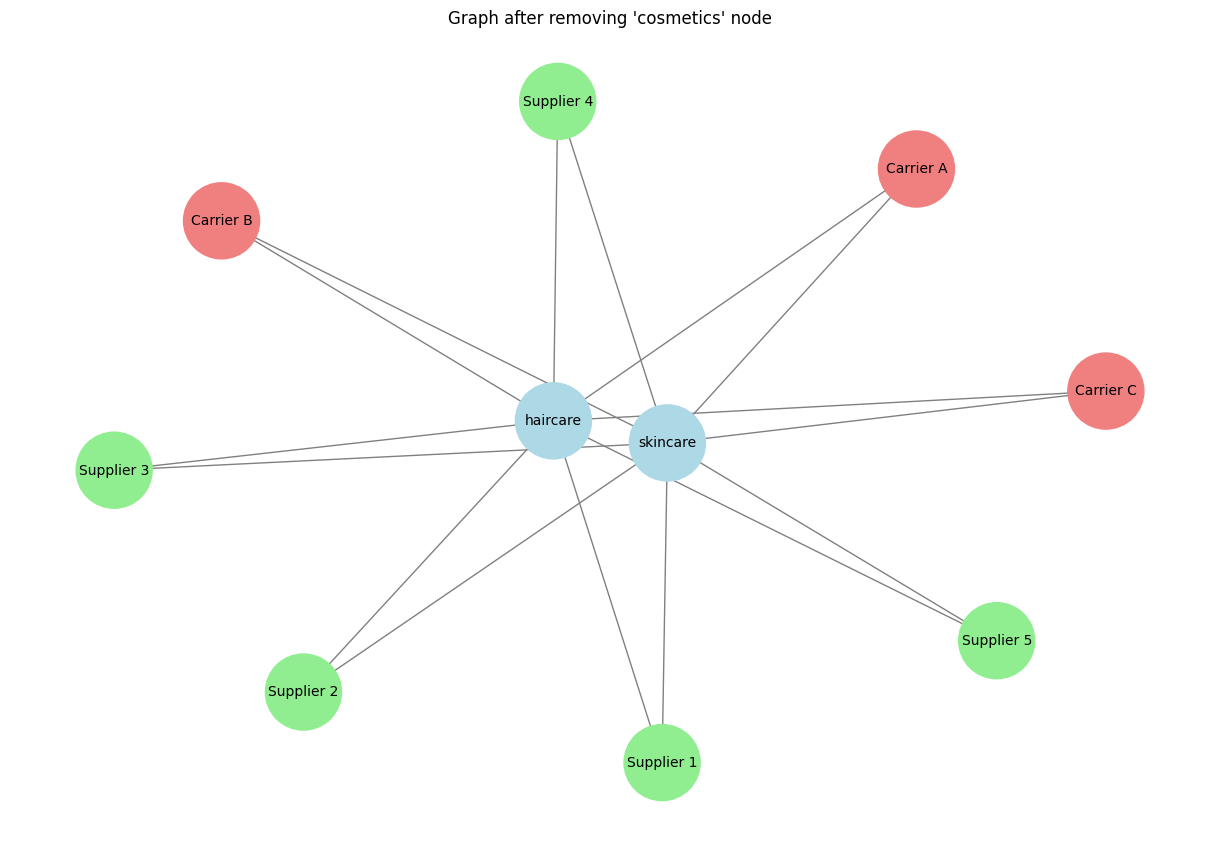

In [ ]:
# Remove the 'cosmetics' node
G.remove_node('cosmetics')

# Draw the graph after removing 'cosmetics' node
draw_graph(G, "Graph after removing 'cosmetics' node")


The node "Cosmetics " is removed

Remove Edge

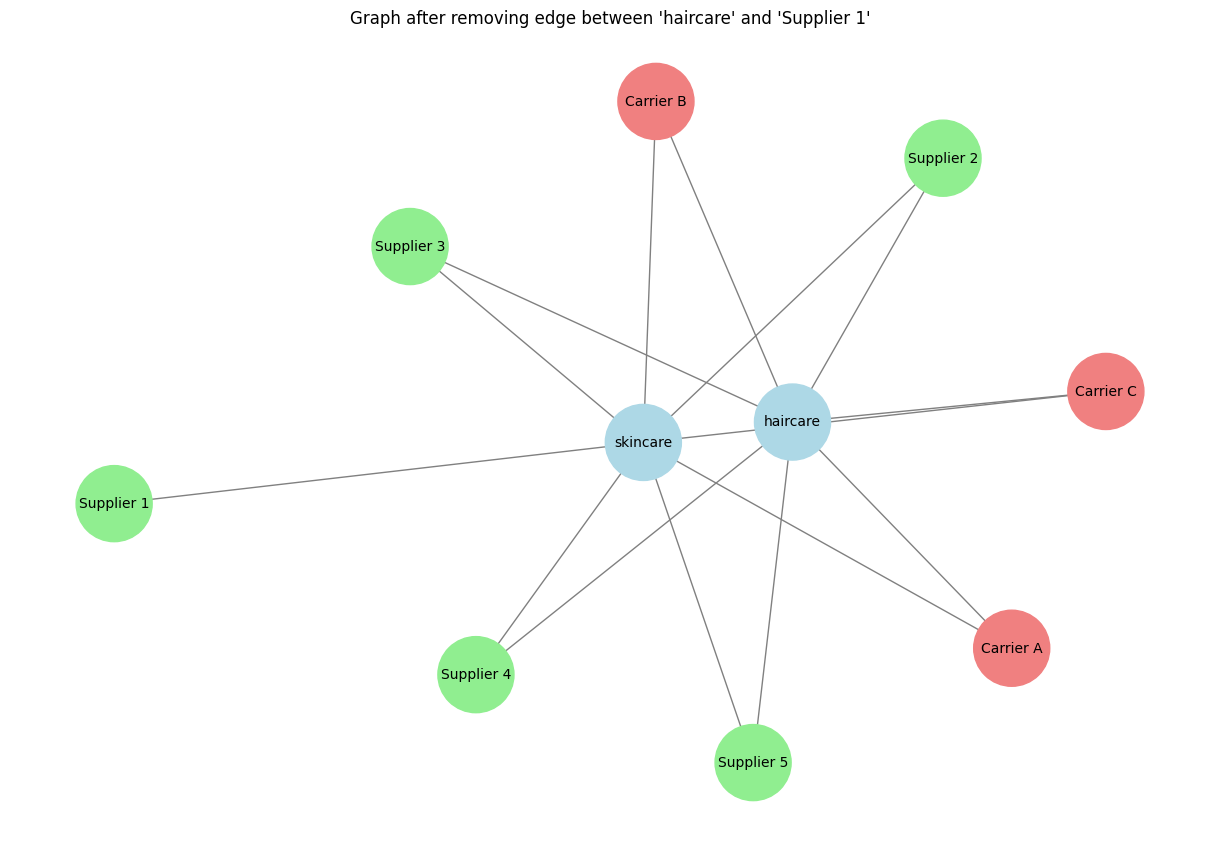

In [ ]:
# Remove the edge between 'haircare' and 'Supplier 1'
G.remove_edge('haircare', 'Supplier 1')

# Draw the graph after removing edge between 'haircare' and 'Supplier 1'
draw_graph(G, "Graph after removing edge between 'haircare' and 'Supplier 1'")


Splitting of nodes

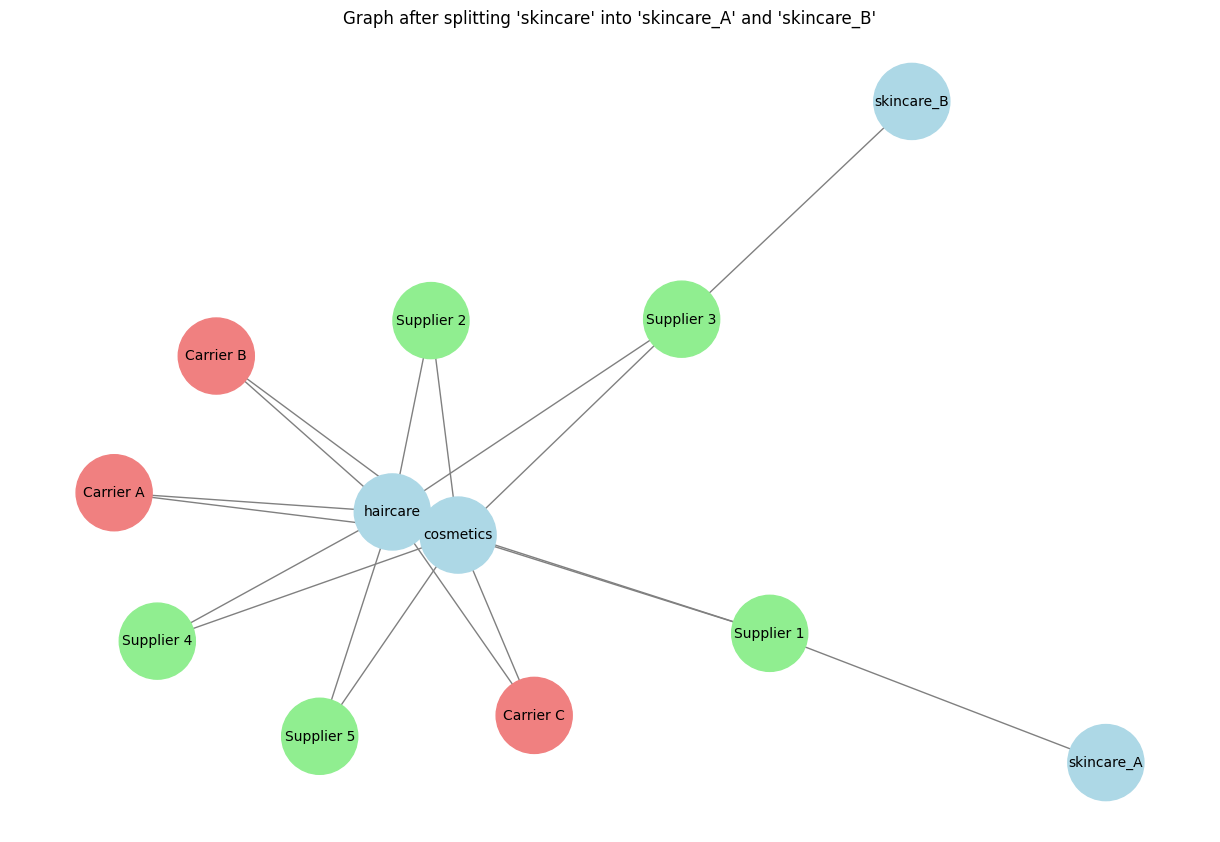

In [ ]:
# Split 'skincare' into 'skincare_A' and 'skincare_B'
G.add_node('skincare_A', type='product')
G.add_node('skincare_B', type='product')
G.add_edge('skincare_A', 'Supplier 1', carrier='Carrier B')
G.add_edge('skincare_B', 'Supplier 3', carrier='Carrier C')

# Remove the original 'skincare' node
G.remove_node('skincare')

# Draw the graph after splitting 'skincare' into 'skincare_A' and 'skincare_B'
draw_graph(G, "Graph after splitting 'skincare' into 'skincare_A' and 'skincare_B'")


Adding new node

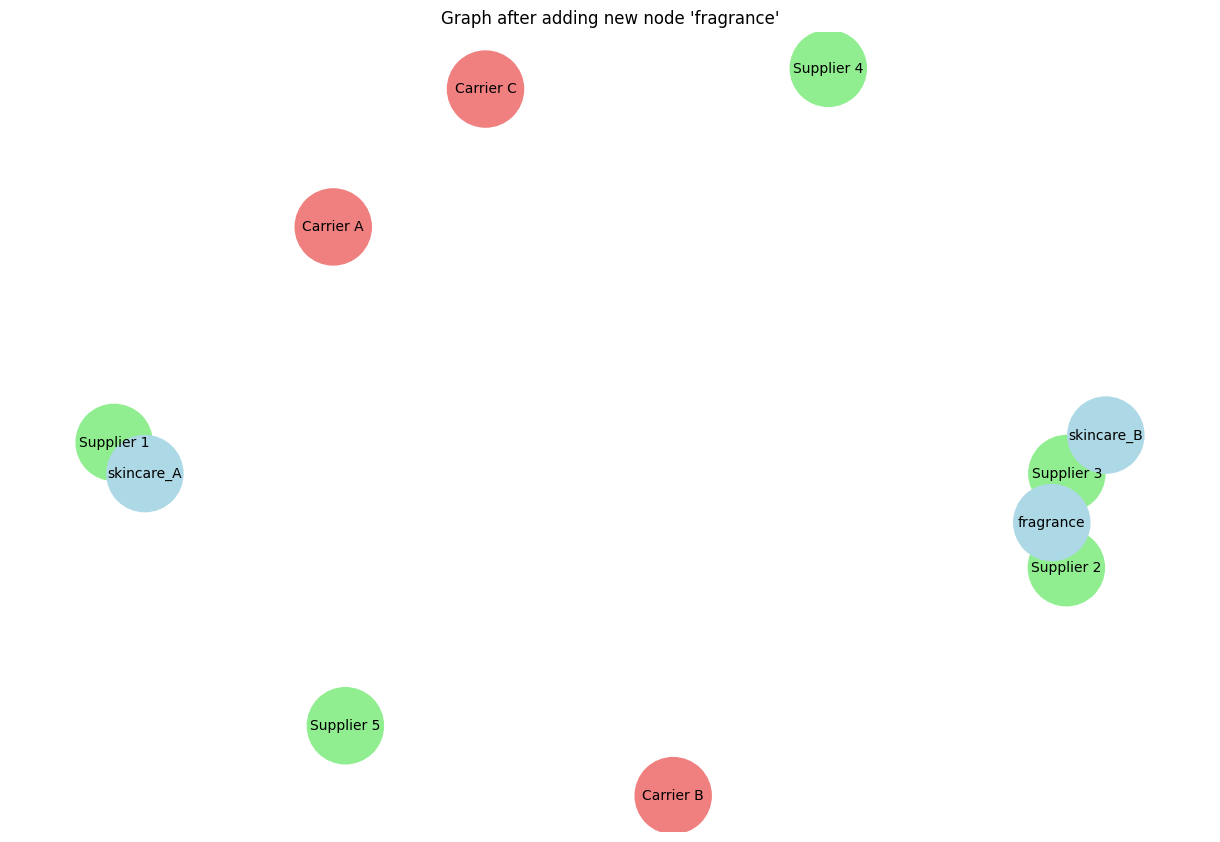

In [ ]:
# Add a new node 'fragrance' representing a new product type
G.add_node('fragrance', type='product')

# Add edges for 'fragrance' with suppliers
G.add_edge('fragrance', 'Supplier 2', carrier='Carrier B')
G.add_edge('fragrance', 'Supplier 3', carrier='Carrier A')

# Draw the graph after adding the new node 'fragrance'
draw_graph(G, "Graph after adding new node 'fragrance'")


# **Final Interpretation**



The process of graph manipulation and transformation illustrated how NetworkX can be effectively used to handle real-world scenarios such as merging and splitting nodes to reflect changes in product categorization or organizational structure. Each step ensured that the integrity of the graph was maintained, with attributes and relationships preserved throughout the operations. This approach not only facilitates data analysis but also supports decision-making processes by providing a clear visual and structural representation of complex relationships within datasets.